# Importing Data
https://www.kaggle.com/datasets/afifaniks/bangla-music-dataset?resource=download

In [1]:
import pandas as pd
import seaborn as sns

In [4]:
data = pd.read_csv('dataset.csv')

In [5]:
data.head()

,file_name,zero_crossing,spectral_centroid,spectral_rolloff,spectral_bandwidth,chroma_frequency,rmse,delta,melspectogram,tempo,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,label
0,(Tomake Paowa) - Hridoy Khan & Tasnim Anika F...,125424,1770.889394,3893.575094,2414.810615,0.315795,0.222552,-7.661680e-08,12.977708,172.265625,...,3.164991,-3.867179,5.325016,1.176338,-0.788755,-6.343288,2.488148,0.047027,7.211918,adhunik
1,008. Jai Bole Jete Naire - Jewel (1980).mp3,308658,2549.349989,4986.658880,2193.617981,0.310113,0.156930,8.893313e-08,5.118271,143.554688,...,8.358729,-12.691169,11.393858,-6.176215,9.947330,-6.987708,7.935905,-9.452455,1.582699,adhunik
2,03. Doob Habib ft Mousumi & Mosharraf Karim...,158328,2013.718396,4573.595848,2515.994413,0.301663,0.093736,1.340824e-07,2.497263,103.359375,...,-3.361615,-6.730814,0.184162,-4.139533,4.409801,3.190835,4.862090,-6.406590,-0.705287,adhunik
3,034. Mukhe Bolo Valobashi by Muni Kis.mp3,136711,1827.495303,4215.075766,2284.762196,0.349875,0.039457,-1.908483e-08,0.421975,135.999178,...,8.563364,-7.990767,3.611352,-4.211268,5.490051,-7.556331,1.124302,-4.306443,0.957663,adhunik
4,05. Abar elo Je Shondha by Happy Akhand.mp3,238711,1715.832235,3303.949296,1587.488472,0.300132,0.142870,-5.355904e-08,4.311442,92.285156,...,-1.230101,-5.323076,-3.194775,-7.124155,-4.431173,-4.797250,-4.686700,-4.393025,-1.749295,adhunik


# Separating Features and Target Variable

In [6]:
X = data.iloc[:,:-1] 

In [7]:
X
print(X.dtypes)

file_name              object
zero_crossing           int64
spectral_centroid     float64
spectral_rolloff      float64
spectral_bandwidth    float64
chroma_frequency      float64
rmse                  float64
delta                 float64
melspectogram         float64
tempo                 float64
mfcc0                 float64
mfcc1                 float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc8                 float64
mfcc9                 float64
mfcc10                float64
mfcc11                float64
mfcc12                float64
mfcc13                float64
mfcc14                float64
mfcc15                float64
mfcc16                float64
mfcc17                float64
mfcc18                float64
mfcc19                float64
dtype: object


In [8]:
y = data.iloc[:,-1]

In [9]:
y

0        adhunik
1        adhunik
2        adhunik
3        adhunik
4        adhunik
          ...   
1737    rabindra
1738    rabindra
1739    rabindra
1740    rabindra
1741    rabindra
Name: label, Length: 1742, dtype: object

In [21]:
pd.isnull(y).sum()

0

# Handling Missing data

In [10]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values = np.nan , strategy = 'mean')

In [11]:
numerical_cols = list(np.where((X.dtypes == np.int64) | (X.dtypes == np.float64))[0])

numerical_cols

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [22]:
imp_mean.fit(X.iloc[:,numerical_cols]) # now, fitting mean value in place of nan values based on the column which have numeric values

SimpleImputer(strategy='most_frequent')

In [23]:
X.iloc[:,numerical_cols] = imp_mean.transform(X.iloc[:,numerical_cols]) # updating/transforming the actual data i.e, X

# Handling Missing String data

In [24]:
imp_mean = SimpleImputer(missing_values = np.nan , strategy = 'most_frequent')

In [25]:
string_cols = list((np.where(X.dtypes ==object))[0])
string_cols  

[0]

In [26]:
imp_mean.fit(X.iloc[:,string_cols])

SimpleImputer(strategy='most_frequent')

In [27]:
X.iloc[:,string_cols] = imp_mean.transform(X.iloc[:,string_cols])

In [28]:
pd.isnull(X).sum()

file_name             0
zero_crossing         0
spectral_centroid     0
spectral_rolloff      0
spectral_bandwidth    0
chroma_frequency      0
rmse                  0
delta                 0
melspectogram         0
tempo                 0
mfcc0                 0
mfcc1                 0
mfcc2                 0
mfcc3                 0
mfcc4                 0
mfcc5                 0
mfcc6                 0
mfcc7                 0
mfcc8                 0
mfcc9                 0
mfcc10                0
mfcc11                0
mfcc12                0
mfcc13                0
mfcc14                0
mfcc15                0
mfcc16                0
mfcc17                0
mfcc18                0
mfcc19                0
dtype: int64

In [29]:
# Checking correlation
data.corr()

,zero_crossing,spectral_centroid,spectral_rolloff,spectral_bandwidth,chroma_frequency,rmse,delta,melspectogram,tempo,mfcc0,...,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19
zero_crossing,1.000000,0.836705,0.714102,0.511658,0.398226,0.030248,-0.000701,-0.039075,0.024012,0.463207,...,0.053979,0.235931,-0.090805,0.211259,-0.082041,0.175625,-0.092151,0.118193,-0.110052,0.134052
spectral_centroid,0.836705,1.000000,0.974970,0.883767,0.632987,0.079660,-0.009338,0.029239,-0.035863,0.697601,...,0.185232,0.438312,0.024155,0.386237,-0.002493,0.299043,-0.151593,0.286027,-0.141790,0.253802
spectral_rolloff,0.714102,0.974970,1.000000,0.942248,0.669192,0.089093,-0.005574,0.047097,-0.052414,0.720824,...,0.226533,0.468162,0.067462,0.414394,0.013595,0.312249,-0.161499,0.303749,-0.142500,0.259022
spectral_bandwidth,0.511658,0.883767,0.942248,1.000000,0.658648,0.088186,-0.000997,0.060653,-0.064467,0.742015,...,0.231082,0.505973,0.098267,0.451186,0.045583,0.329447,-0.184342,0.359013,-0.156563,0.278880
chroma_frequency,0.398226,0.632987,0.669192,0.658648,1.000000,0.164369,0.006934,0.139936,-0.125043,0.598550,...,0.434988,0.547348,0.298046,0.399025,0.146412,0.307333,-0.163910,0.285890,-0.058547,0.189611
rmse,0.030248,0.079660,0.089093,0.088186,0.164369,1.000000,-0.007573,0.954087,-0.080422,0.554257,...,0.142676,0.165231,0.166345,0.147526,0.116307,0.160808,0.040492,0.141023,0.046105,0.122074
delta,-0.000701,-0.009338,-0.005574,-0.000997,0.006934,-0.007573,1.000000,-0.000252,-0.008868,-0.001455,...,-0.027657,-0.019458,-0.011164,-0.000914,-0.001794,0.008250,-0.020130,-0.009608,-0.016189,-0.017554
melspectogram,-0.039075,0.029239,0.047097,0.060653,0.139936,0.954087,-0.000252,1.000000,-0.064182,0.465012,...,0.142695,0.151257,0.156240,0.133978,0.117706,0.150431,0.057657,0.142462,0.060429,0.122503
tempo,0.024012,-0.035863,-0.052414,-0.064467,-0.125043,-0.080422,-0.008868,-0.064182,1.000000,-0.067099,...,-0.092869,-0.098939,-0.112337,-0.071424,-0.078885,-0.064704,-0.049678,-0.082679,-0.062953,-0.035412
mfcc0,0.463207,0.697601,0.720824,0.742015,0.598550,0.554257,-0.001455,0.465012,-0.067099,1.000000,...,0.207520,0.444907,0.111453,0.368386,0.038919,0.272358,-0.179681,0.275082,-0.131998,0.191386


In [30]:
data.dtypes

file_name              object
zero_crossing           int64
spectral_centroid     float64
spectral_rolloff      float64
spectral_bandwidth    float64
chroma_frequency      float64
rmse                  float64
delta                 float64
melspectogram         float64
tempo                 float64
mfcc0                 float64
mfcc1                 float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc8                 float64
mfcc9                 float64
mfcc10                float64
mfcc11                float64
mfcc12                float64
mfcc13                float64
mfcc14                float64
mfcc15                float64
mfcc16                float64
mfcc17                float64
mfcc18                float64
mfcc19                float64
label                  object
dtype: object

# OneHotEncoder Method

In [31]:
def OneHotEncoderMethod(indices,data):
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.compose import ColumnTransformer
    ColumnTransformer = ColumnTransformer([('encoder', OneHotEncoder(),indices)],remainder = 'passthrough')
    return ColumnTransformer.fit_transform(data)

# Label Encoding Method

In [32]:
def LabelEncodingMethod(series):
    from sklearn import preprocessing
    le = preprocessing.LabelEncoder()
    le.fit(series)
    #print('Actual labels :',le.classes_)
    #print('Encoding values :',le.transform(pd.unique(series)))
    return le.fit_transform(series)

## Label encoding target feature

In [33]:
y = LabelEncodingMethod(y)

# Encoding Selection for X

In [34]:
def EncodingSelection(X,threshold =10):
    #Step 1: selecting the columns
    string_cols = list((np.where(X.dtypes ==object))[0])
    one_hot_encoding_indices = []
    
    #Step 2: if the no. of category is 2 and more than threshold, then label encode
    for col in string_cols:
        length = len(pd.unique(X[X.columns[col]]))
        if length == 2 or length > threshold:
            X[X.columns[col]] = LabelEncodingMethod(X[X.columns[col]])
        else:
            one_hot_encoding_indices.append(col)
    #Step 3: OneHotEncoding
    X = OneHotEncoderMethod(one_hot_encoding_indices,X)
    return X

In [35]:
X = EncodingSelection(X)

In [36]:
X.shape

(1742, 30)

<AxesSubplot:>

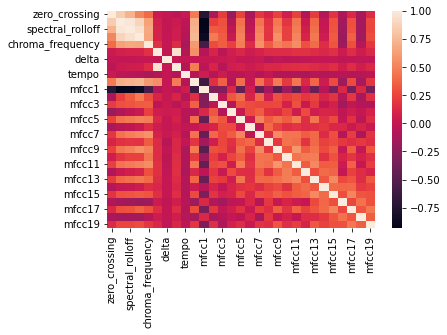

In [37]:
sns.heatmap(data.corr())

# Feature Selection

In [38]:
from sklearn.feature_selection import SelectKBest, chi2

In [39]:
kbest = SelectKBest(score_func = chi2 , k = 10)

In [40]:
# To remove negative values we do MinMaxScaler feature scaling

In [41]:
from sklearn import preprocessing
MMS = preprocessing.MinMaxScaler()

In [42]:
x_temp = MMS.fit_transform(X)

In [43]:
x_temp = kbest.fit(x_temp,y)

In [44]:
x_temp.scores_

array([6.24794412e+01, 1.81498846e+01, 3.36656369e+01, 5.83373272e+01,
       6.13838139e+01, 2.84340414e+01, 6.47411925e+00, 2.71975832e-02,
       8.28887917e+00, 9.48043058e+00, 3.31196542e+00, 3.39820060e+01,
       1.34286132e+01, 6.04780314e+00, 6.77965948e+00, 8.35281818e+00,
       6.86805005e-01, 1.42949216e+01, 2.79750499e+00, 1.21794670e+01,
       7.33487609e+00, 1.17649542e+01, 8.62045526e+00, 9.84494249e+00,
       4.85243852e+00, 4.98167889e+00, 4.59031616e+00, 5.81612046e+00,
       2.33970479e+00, 3.53054882e+00])

In [45]:
for i in np.sort(x_temp.scores_):
    print('{0:.10f}'.format(i))

0.0271975832
0.6868050046
2.3397047894
2.7975049948
3.3119654169
3.5305488200
4.5903161642
4.8524385223
4.9816788854
5.8161204587
6.0478031356
6.4741192522
6.7796594778
7.3348760909
8.2888791672
8.3528181844
8.6204552551
9.4804305785
9.8449424876
11.7649541528
12.1794669732
13.4286132002
14.2949215813
18.1498845738
28.4340413913
33.6656369349
33.9820059509
58.3373272361
61.3838139208
62.4794411646


In [46]:
np.argsort(x_temp.scores_)

array([ 7, 16, 28, 18, 10, 29, 26, 24, 25, 27, 13,  6, 14, 20,  8, 15, 22,
        9, 23, 21, 19, 12, 17,  1,  5,  2, 11,  3,  4,  0], dtype=int64)

In [47]:
k_features = 12
best_features = np.argsort(x_temp.scores_)[-k_features:]
features_to_delete = np.argsort(x_temp.scores_)[:-k_features]

In [48]:
features_to_delete

array([ 7, 16, 28, 18, 10, 29, 26, 24, 25, 27, 13,  6, 14, 20,  8, 15, 22,
        9], dtype=int64)

In [49]:
# Delete columns which are not useful
X = np.delete(X, features_to_delete, axis =1)

In [51]:
X.shape

(1742, 12)

In [52]:
del x_temp

# Train test split

In [53]:
import numpy as np
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size =0.2, random_state =1)

In [55]:
print(X_train.shape)

(1393, 12)


# Feature Scaling

In [56]:
from sklearn import preprocessing

In [57]:
sc = preprocessing.StandardScaler(with_mean=False)

In [58]:
sc.fit(X_train)

StandardScaler(with_mean=False)

In [59]:
X_train = sc.transform(X_train)

In [60]:
print(X_train.shape)

(1393, 12)


In [61]:
X_test = sc.transform(X_test)

In [62]:
print(X_test.shape)

(349, 12)


####  Data is ready !!!

In [63]:
from sklearn.metrics import accuracy_score

# Building KNN model

In [73]:
from sklearn.neighbors import KNeighborsClassifier
KNNClassifier = KNeighborsClassifier(n_neighbors=8)
KNNClassifier.fit(X_train,y_train)
y_pred = KNNClassifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.6790830945558739